<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_cluster_data(y_hat)_add_delta_(1_2)_n250_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_1.2'

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_1.2_n250.csv')

In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,54.234497,61.826805,51.637197,-10.255512,167.442986,178.629874,-11.186889
1,0.0,1.0,32.336680,53.435957,52.595927,15.737989,164.106554,150.770393,13.336161
2,0.0,2.0,53.537903,73.372301,89.777203,-23.081927,203.605480,227.032513,-23.427033
3,0.0,3.0,25.261124,53.139778,26.355606,25.139299,139.895807,117.757882,22.137925
4,0.0,4.0,92.370585,23.001003,40.921932,0.094235,166.387755,166.320397,0.067358
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,95.147349,82.334437,42.139397,-2.267174,227.354008,226.782367,0.571641
249996,999.0,246.0,41.145821,61.756726,41.489983,7.054658,161.447188,155.295797,6.151391
249997,999.0,247.0,87.558503,54.792547,97.629389,-18.785751,231.194687,246.538159,-15.343472
249998,999.0,248.0,47.191632,42.900847,90.073764,-9.859909,180.306334,189.659785,-9.353451


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3          e           Y  \
rep   index                                                           
0.0   0.0    54.234497  61.826805  51.637197 -10.255512  167.442986   
      1.0    32.336680  53.435957  52.595927  15.737989  164.106554   
      2.0    53.537903  73.372301  89.777203 -23.081927  203.605480   
      3.0    25.261124  53.139778  26.355606  25.139299  139.895807   
      4.0    92.370585  23.001003  40.921932   0.094235  166.387755   
...                ...        ...        ...        ...         ...   
999.0 245.0  95.147349  82.334437  42.139397  -2.267174  227.354008   
      246.0  41.145821  61.756726  41.489983   7.054658  161.447188   
      247.0  87.558503  54.792547  97.629389 -18.785751  231.194687   
      248.0  47.191632  42.900847  90.073764  -9.859909  180.306334   
      249.0  28.610254  84.259493  60.711151   0.322775  183.903672   

                  y_hat      e_hat  
rep   index                         
0.0   0.0    178.629874 -11.186889  
      1.0    150.770393  13.336161  
      2.0    227.032513 -23.427033  
      3.0    117.757882  22.137925  
      4.0    166.320397   0.067358  
...                 ...        ...  
999.0 245.0  226.782367   0.571641  
      246.0  155.295797   6.151391  
      247.0  246.538159 -15.343472  
      248.0  189.659785  -9.353451  
      249.0  184.444404  -0.540732  

[250000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3          e           Y  \
rep   index                                                           
0.0   0.0    54.234497  61.826805  51.637197 -10.255512  167.442986   
      1.0    32.336680  53.435957  52.595927  15.737989  164.106554   
      2.0    53.537903  73.372301  89.777203 -23.081927  203.605480   
      3.0    25.261124  53.139778  26.355606  25.139299  139.895807   
      4.0    92.370585  23.001003  40.921932   0.094235  166.387755   
...                ...        ...        ...        ...         ...   
999.0 245.0  95.147349  82.334437  42.139397  -2.267174  227.354008   
      246.0  41.145821  61.756726  41.489983   7.054658  161.447188   
      247.0  87.558503  54.792547  97.629389 -18.785751  231.194687   
      248.0  47.191632  42.900847  90.073764  -9.859909  180.306334   
      249.0  28.610254  84.259493  60.711151   0.322775  183.903672   

                  y_hat      e_hat  
rep   index                         
0.0   0.0    178.629874 -11.186889  
      1.0    150.770393  13.336161  
      2.0    227.032513 -23.427033  
      3.0    117.757882  22.137925  
      4.0    166.320397   0.067358  
...                 ...        ...  
999.0 245.0  226.782367   0.571641  
      246.0  155.295797   6.151391  
      247.0  246.538159 -15.343472  
      248.0  189.659785  -9.353451  
      249.0  184.444404  -0.540732  

[250000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,54.234497,61.826805,51.637197,-10.255512,167.442986,178.629874,-11.186889
1,0.0,1.0,32.336680,53.435957,52.595927,15.737989,164.106554,150.770393,13.336161
2,0.0,2.0,53.537903,73.372301,89.777203,-23.081927,203.605480,227.032513,-23.427033
3,0.0,3.0,25.261124,53.139778,26.355606,25.139299,139.895807,117.757882,22.137925
4,0.0,4.0,92.370585,23.001003,40.921932,0.094235,166.387755,166.320397,0.067358
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,95.147349,82.334437,42.139397,-2.267174,227.354008,226.782367,0.571641
249996,999.0,246.0,41.145821,61.756726,41.489983,7.054658,161.447188,155.295797,6.151391
249997,999.0,247.0,87.558503,54.792547,97.629389,-18.785751,231.194687,246.538159,-15.343472
249998,999.0,248.0,47.191632,42.900847,90.073764,-9.859909,180.306334,189.659785,-9.353451


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3          e           Y  \
rep   index                                                           
0.0   0.0    54.234497  61.826805  51.637197 -10.255512  167.442986   
      1.0    32.336680  53.435957  52.595927  15.737989  164.106554   
      2.0    53.537903  73.372301  89.777203 -23.081927  203.605480   
      3.0    25.261124  53.139778  26.355606  25.139299  139.895807   
      4.0    92.370585  23.001003  40.921932   0.094235  166.387755   
...                ...        ...        ...        ...         ...   
999.0 245.0  95.147349  82.334437  42.139397  -2.267174  227.354008   
      246.0  41.145821  61.756726  41.489983   7.054658  161.447188   
      247.0  87.558503  54.792547  97.629389 -18.785751  231.194687   
      248.0  47.191632  42.900847  90.073764  -9.859909  180.306334   
      249.0  28.610254  84.259493  60.711151   0.322775  183.903672   

                  y_hat      e_hat  
rep   index                         
0.0   0.0    178.629874 -11.186889  
      1.0    150.770393  13.336161  
      2.0    227.032513 -23.427033  
      3.0    117.757882  22.137925  
      4.0    166.320397   0.067358  
...                 ...        ...  
999.0 245.0  226.782367   0.571641  
      246.0  155.295797   6.151391  
      247.0  246.538159 -15.343472  
      248.0  189.659785  -9.353451  
      249.0  184.444404  -0.540732  

[250000 rows x 7 columns]

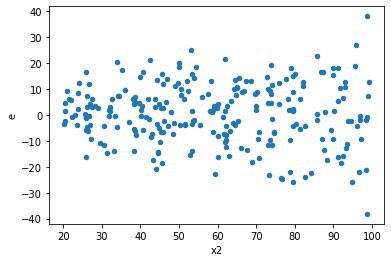

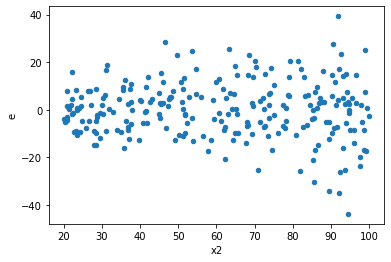

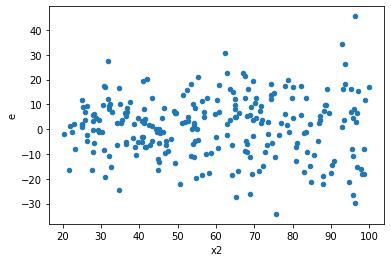

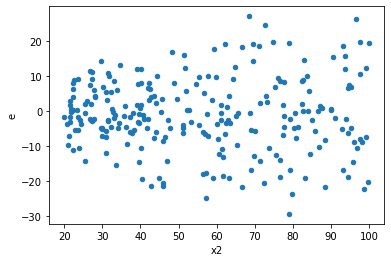

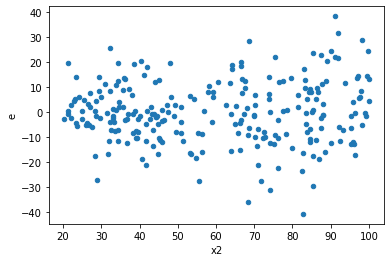

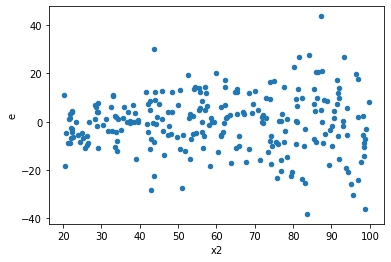

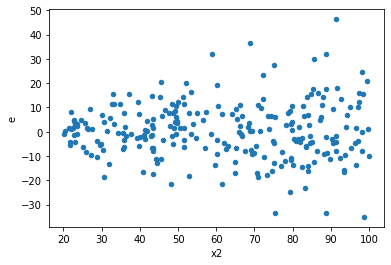

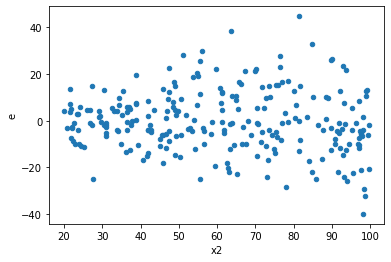

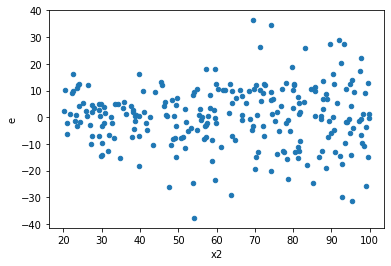

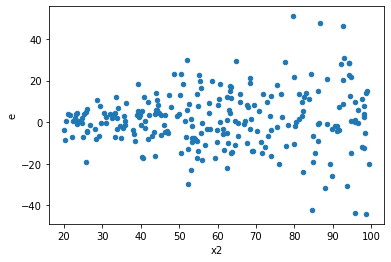

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,126.0,118.0,14631.786765992154,18820.83439120015,116.12529179358852,159.4985965355945,1.3735043767993416,0.08193649078878162,0.9590317546056092,0.04096824539439081,Reject005=1 : Homoscedasticity
7.0,122.0,122.0,15987.858389080204,25118.81690541631,131.04801958262462,205.89194184767467,1.5711183007833371,0.013155768387388633,0.9934221158063057,0.006577884193694317,Reject005=0 : Heteroscedasticity
10.0,116.0,128.0,10984.306856570223,25965.291116416403,94.69230048767434,202.85383684700315,2.1422421443167674,3.0059198453225022e-05,0.9999849704007734,1.5029599226612511e-05,Reject005=0 : Heteroscedasticity
12.0,132.0,112.0,13947.221572457569,16892.196466735466,105.66076948831491,150.8231827387095,1.4274283962638483,0.05294827763925869,0.9735258611803707,0.026474138819629345,Reject005=1 : Homoscedasticity
16.0,134.0,110.0,18574.57550091854,20966.18257521046,138.61623508148165,190.60165977464055,1.3750312844855492,0.08396622001289233,0.9580168899935538,0.04198311000644617,Reject005=1 : Homoscedasticity
18.0,128.0,116.0,14034.503897525401,17999.162538936074,109.6445616994172,155.16519430117305,1.415165439089879,0.05764449914929237,0.9711777504253538,0.028822249574646186,Reject005=1 : Homoscedasticity
19.0,124.0,120.0,15516.347347384008,20749.229571482367,125.13183344664522,172.91024642901974,1.3818246058285935,0.07577188086822773,0.9621140595658861,0.03788594043411386,Reject005=1 : Homoscedasticity
20.0,113.0,131.0,12892.719640777696,24511.029452248727,114.09486407767872,187.1070950553338,1.639925658072974,0.006411238457634916,0.9967943807711825,0.003205619228817458,Reject005=0 : Heteroscedasticity
22.0,134.0,110.0,14858.577956630765,18439.148573423365,110.88491012411018,167.62862339475785,1.51173521453132,0.025243995394663044,0.9873780023026685,0.012621997697331522,Reject005=0 : Heteroscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,135.0,109.0,19573.908464623353,12513.356866035181,144.9919145527656,114.80143913793744,0.7917782139234998,0.19713044763973037,Reject005=1 : Homoscedasticity
1.0,126.0,118.0,14631.786765992154,18820.83439120015,116.12529179358852,159.4985965355945,1.3735043767993416,0.08193649078878162,Reject005=1 : Homoscedasticity
2.0,128.0,116.0,23500.862281906677,12990.040929898245,183.6004865773959,111.98311146464005,0.6099281845717446,0.00649240706445232,Reject005=0 : Heteroscedasticity
3.0,97.0,147.0,12654.108760205345,13210.821072277487,130.45472948665304,89.86953110392848,0.6888943885558639,0.04917295140384129,Reject005=0 : Heteroscedasticity
4.0,114.0,130.0,21313.345723042068,16371.231708755617,186.95917300914095,125.93255160581244,0.6735831656660957,0.03132401845542282,Reject005=0 : Heteroscedasticity
5.0,125.0,119.0,22068.048973028453,12587.035673483246,176.54439178422763,105.77340902086762,0.5991320820326242,0.0048836938851245775,Reject005=0 : Heteroscedasticity
6.0,123.0,121.0,17588.682500996856,15117.87636721652,142.9974187072915,124.94112700178943,0.8737299465351721,0.45671143212398047,Reject005=1 : Homoscedasticity
7.0,122.0,122.0,15987.858389080204,25118.81690541631,131.04801958262462,205.89194184767467,1.5711183007833371,0.013155768387388633,Reject005=0 : Heteroscedasticity
8.0,130.0,114.0,21416.35316055234,11076.342262030133,164.74117815809493,97.16089703535205,0.5897790590165075,0.0036407680859576797,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    628
Reject005=1 : Homoscedasticity      372
Name: Result_test, dtype: int64